<a href="https://colab.research.google.com/github/shanthivijayan/Capstone-Project/blob/main/Hands_on_Lab_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extract information from the given web site
You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=requests.get(url).text

In [4]:
soup=BeautifulSoup(data,'html.parser')


Scrape the `Language name` and `annual average salary`.


In [33]:
#your code goes here
table=soup.find('table')
table
lang_salary_combine=[]
for row in table.find_all('tr'):
    cols=row.find_all('td')
    Language_name=cols[1].getText()
    annual_average_salary=cols[3].getText()
    lang_salary=[Language_name , annual_average_salary]
    lang_salary_combine.append(lang_salary)
print(lang_salary_combine)


[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named *popular-languages.csv*


In [34]:
# your code goes here
import csv
with open('popular-languages.csv','w',newline='') as file:
    csvwriter = csv.writer(file)
    for row in lang_salary_combine:
        csvwriter.writerow(row)

import pandas as pd
df = pd.read_csv('popular-languages.csv')
df.head(50)

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


<Axes: xlabel='Average Annual Salary', ylabel='Language'>

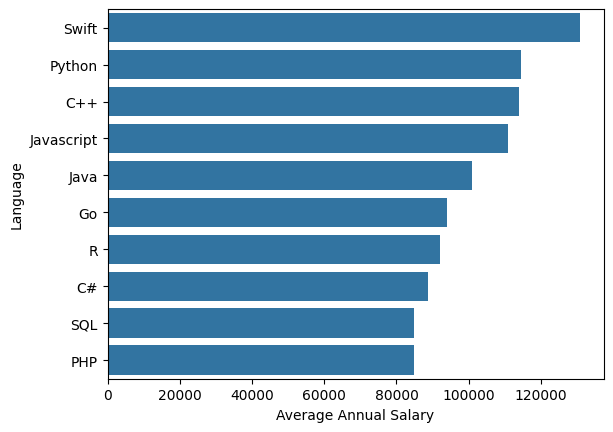

In [76]:
df.dtypes
pattern = r'[^\w\s]'
df['Average Annual Salary']=df['Average Annual Salary'].astype(str)
df['Average Annual Salary']=df['Average Annual Salary'].replace(pattern, '', regex=True)
df['Average Annual Salary']=df['Average Annual Salary'].astype(int)
df=df.sort_values(by='Average Annual Salary',ascending=False)
df.dtypes
#df.plot(kind='barh')
sns.barplot(df,x='Average Annual Salary',y='Language')